In [1]:
import tensorflow as ts 
import numpy as np
import matplotlib.pyplot as plt

2025-05-03 22:59:47.114798: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
obs  = 1000
xx =  np.random.uniform(low =-1,high = 1,size=(obs,1))
zz  =  np.random.uniform(low =-1,high = 1,size=(obs,1))
imputs  = np.column_stack((xx,zz))

noise   =  np.random.uniform(low =-1,high = 1,size=(obs,1))

import math

y =  3*xx-6*xx+8+noise


eula = 1 / (1 + np.exp(-y))
npz = np.savez('my_tf_file',inputs = imputs,targets= y)

In [3]:
df = np.load('my_tf_file.npz')

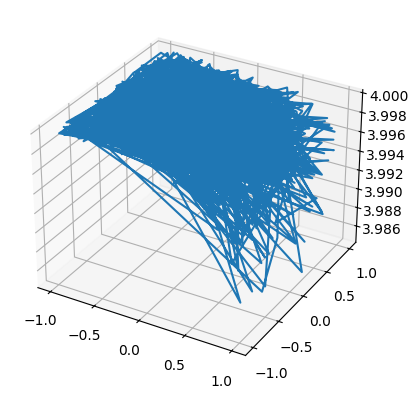

In [4]:
fig =plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.plot(xx,zz,eula+3)

In [5]:
df

NpzFile 'my_tf_file.npz' with keys: inputs, targets

In [6]:
in_size = 2
outputs = 1

model = ts.keras.Sequential([
    ts.keras.layers.Dense(outputs,
                          kernel_initializer = ts.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer = ts.random_uniform_initializer(minval=-0.1,maxval=0.1))
])

optimize = ts.keras.optimizers.SGD(learning_rate = 0.02)
model.compile(optimizer = optimize,loss = 'mean_squared_error')
model.fit(df['inputs'],df['targets'],epochs=30,verbose=2)

Epoch 1/30
32/32 - 0s - 12ms/step - loss: 26.7903
Epoch 2/30
32/32 - 0s - 2ms/step - loss: 2.8732
Epoch 3/30
32/32 - 0s - 2ms/step - loss: 0.7794
Epoch 4/30
32/32 - 0s - 2ms/step - loss: 0.4760
Epoch 5/30
32/32 - 0s - 2ms/step - loss: 0.3928
Epoch 6/30
32/32 - 0s - 2ms/step - loss: 0.3620
Epoch 7/30
32/32 - 0s - 2ms/step - loss: 0.3505
Epoch 8/30
32/32 - 0s - 2ms/step - loss: 0.3459
Epoch 9/30
32/32 - 0s - 2ms/step - loss: 0.3441
Epoch 10/30
32/32 - 0s - 2ms/step - loss: 0.3431
Epoch 11/30
32/32 - 0s - 2ms/step - loss: 0.3427
Epoch 12/30
32/32 - 0s - 2ms/step - loss: 0.3428
Epoch 13/30
32/32 - 0s - 2ms/step - loss: 0.3428
Epoch 14/30
32/32 - 0s - 2ms/step - loss: 0.3427
Epoch 15/30
32/32 - 0s - 2ms/step - loss: 0.3426
Epoch 16/30
32/32 - 0s - 2ms/step - loss: 0.3427
Epoch 17/30
32/32 - 0s - 2ms/step - loss: 0.3428
Epoch 18/30
32/32 - 0s - 2ms/step - loss: 0.3427
Epoch 19/30
32/32 - 0s - 2ms/step - loss: 0.3426
Epoch 20/30
32/32 - 0s - 2ms/step - loss: 0.3426
Epoch 21/30
32/32 - 0s - 2m

In [7]:
print(model.layers[0].get_weights()[0])

[[-2.9423163]
 [-0.0119236]]


In [8]:
model.layers[0].get_weights()[1]

array([7.983605], dtype=float32)

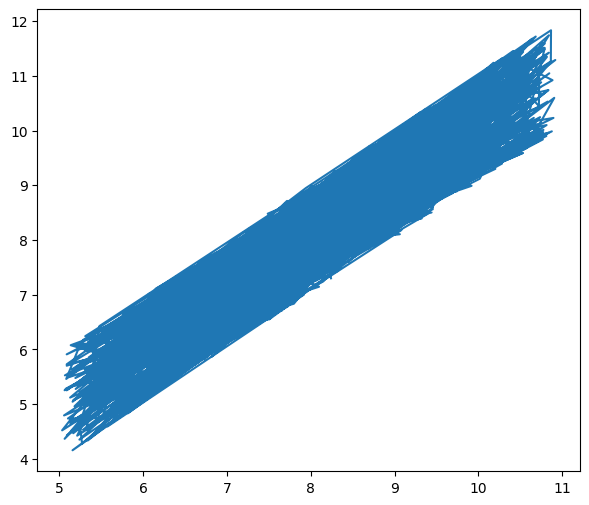

In [9]:
fig ,ax =  plt.subplots(figsize = (7,6))
ax.plot(np.squeeze(model.predict_on_batch(df['inputs'])),np.squeeze(df['targets']))


## numpy neuro network

In [10]:
xx =  np.random.uniform(low =-1,high = 20,size=(obs,1))
zz  =  np.random.uniform(low =-1,high = 20,size=(obs,1))
imputs  = np.column_stack((xx,zz))

noise   =  np.random.uniform(low =-1,high = 20,size=(obs,1))

y =  3*xx+55*xx+noise




init  = 0.2
weight =  np.random.uniform(-init,init,size=(2,1))
bias =  np.random.uniform(-init,init,size=(1))




rate  = 0.01
for i in range(30):
    out = np.dot(imputs,weight)+bias
    delta =  out - y
    loss = np.sum(delta**2)/2/obs
    del_scale = delta/obs
    print(loss)
    weight = weight - rate*np.dot(imputs.T,del_scale)

214804.36272430175
262422.6428776294
344453.87856323377
463069.32100571174
627203.0390103896
851462.5392919006
1156715.3092447084
1571737.9983598557
2135808.8279077923
2902375.311366284
3944098.125803749
5359729.981867401
7283473.657470667
9897703.071503716
13450252.026785122
18277909.071245305
24838345.606668282
33753503.99813457
45868558.92384155
62332041.60201957
84704722.82383728
115107577.1169077
156422855.33427024
212567327.74839795
288863601.63698804
392544715.0036302
533439842.9182917
724906122.7979077
985094937.5108142
1338672702.4533973
